In [25]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

plt.rcParams['font.family'] = 'SimHei'     ### # matplotlib其实是不支持显示中文的 显示中文需要一行代码设置字体
plt.rcParams['axes.unicode_minus'] = False

In [26]:
# 读取并查看数据
data = pd.read_csv(r"digit recognizor.csv")
X = data.iloc[:,1:]
y = data.iloc[:,0]
print(X.shape)

(42000, 784)


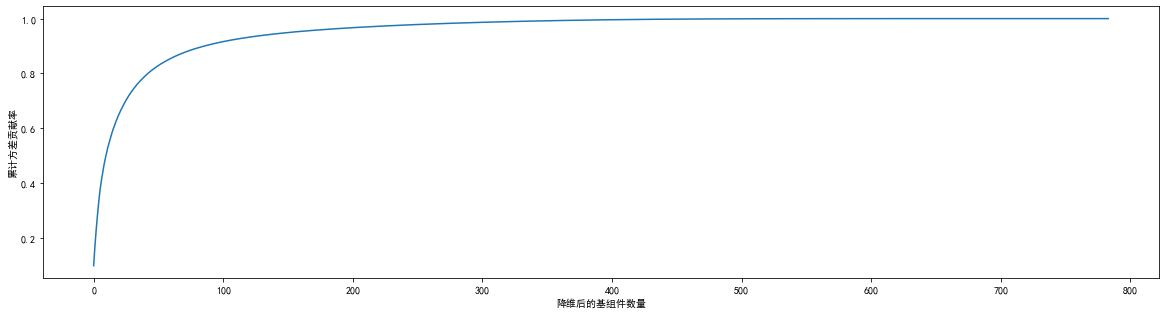

In [27]:
# 画累计方差贡献率曲线，找最佳降维后维度的范围
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("降维后的基组件数量")
plt.ylabel("累计方差贡献率")
plt.show()

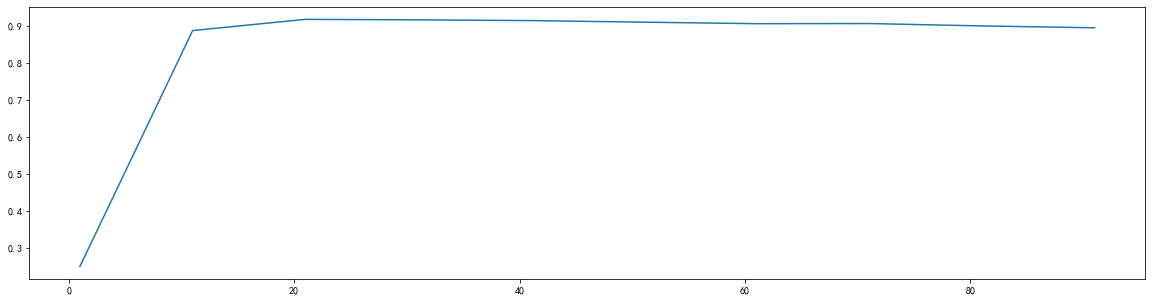

132.38759565353394


In [28]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
time_start = time.time()
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()
time_end = time.time()
time_sum = time_end - time_start
print(time_sum)

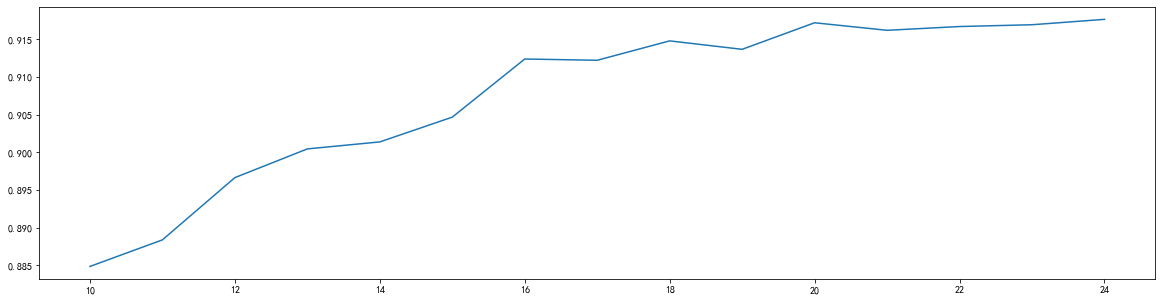

In [29]:
#细化学习曲线，找出降维后的最佳维度
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [30]:
#导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)
print(cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean())

0.9453809523809523


In [ ]:
# 使用默认的KNN参数
print(cross_val_score(KNN(),X_dr,y,cv=5).mean())

In [ ]:
# KNN的K值学习曲线
time_start = time.time()
score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()
time_end = time.time()
time_sum = time_end - time_start
print(time_sum)

In [ ]:
#定下超参数后，模型优化后的结果
cross_val_score(KNN(4),X_dr,y,cv=5).mean()